# Example of model usage

In [1]:
#%matplotlib
from envs.CapsubotEnv import CapsubotEnv
import numpy as np
import time
import matplotlib.pyplot as plt
# pip install stable-baselines3[extra]
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.cmd_util import make_vec_env

try:
    env.close()
except Exception:
    pass

env = CapsubotEnv(force="step")
check_env(env)


print(env.observation_space)
print(env.action_space)
print(env.action_space.sample())
dt = env.dt

env = make_vec_env(lambda: env, n_envs=1)

Box(-10.0, 10.0, (4,), float32)
Discrete(2)
1


/home/xfirefly/.local/lib/python3.8/site-packages/stable_baselines3/common/cmd_util.py:5: FutureWarning: Module ``common.cmd_util`` has been renamed to ``common.env_util`` and will be removed in the future.
  warnings.warn(
/home/xfirefly/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
# Train the agent
ts_num = 10./dt
print(ts_num)
model = PPO('MlpPolicy', env, verbose=1).learn(ts_num)

200000.0
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1531 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1105         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0014264906 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.00486      |
|    learning_rate        | 0.0003       |
|    loss                 | 4.35         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000587    |
|    value_loss           | 21           |
---------------------------------

In [19]:
# Test the trained agent
obs = env.reset()
n_steps = int(5.0/dt)
t = 0.0
states = [obs[0]]
actions = [0]
ts = [t]
for step in range(n_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    t += dt
    states.append(obs[0])
    actions.append(action[0])
    ts.append(t)
    if t % 0.005 <= dt:
        print("Step {}".format(step + 1))
        print("Action: ", action)
        print("obs=", obs, "reward=", reward, "done=", done)
        env.render()
    if done:
        # Note that the VecEnv resets automatically
        # when a done signal is encountered
        print("Goal reached!", "reward=", reward)
        break



Step 1
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 101
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 201
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 301
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 400
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 500
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 600
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 700
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 800
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 900
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 1000
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 1100
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 1200
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 1300
Action:  [0]
obs= [[0. 0. 0. 0.]] reward= [0.] done= [False]
Step 1400
Action: 

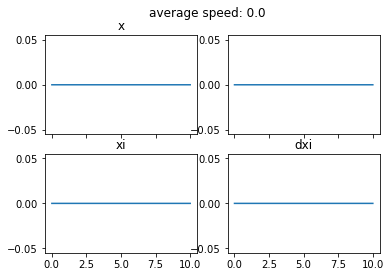

/home/xfirefly/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


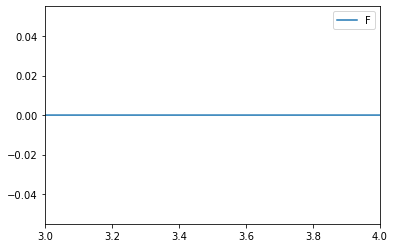

In [20]:
states = np.array(states)

fig, axs = plt.subplots(2, 2, sharex=True)  # , sharex=True, sharey=True)
fig.suptitle("average speed: {:.3}".format( states[-1, 0] / ts[-1]))
axs[0, 0].plot(ts, states[:, 0], label="x")
axs[0, 0].set_title("x")
axs[1, 0].plot(ts, states[:, 1], label="dx")
axs[1, 0].set_title("dx")
axs[0, 1].plot(ts, states[:, 2] + states[:, 0], label="xi")
axs[1, 0].set_title("xi")
axs[1, 1].plot(ts, states[:, 3], label="dxi")
axs[1, 1].set_title("dxi")
t_shift = 3
axs[0, 0].set_xlim(t_shift, t_shift + 1)


plt.figure()
plt.plot(ts, actions, label="F")
plt.xlim(t_shift, t_shift + 1)
plt.legend()
plt.show()

